# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:

## make sure the following dependencies are installed, specifically geopy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests

from scipy import stats
import random as rd
from citipy import citipy
import csv
import os

#to import keys without having them in my repo, added the try block so it'll work for the grader
import sys
try:
    sys.path.insert(1,'/Users/Trav/Desktop/Coding/GitHub_Repositories/API_PACKAGE')
    import api_keys
except:
    import api_keys


## Generate Cities List

In [5]:

## generates 2 lists of random floats for latitude and longitude

samp_size = 1500
lat_list = [round(rd.uniform(-90,90),2) for num in range(samp_size)]
lon_list = [round(rd.uniform(-180,180),2) for num in range(samp_size)]

city_name_list=[]
country_code_list=[]
ex_coor_list=[]

#turns the keys and values from the world cities dict into lists
new_world_keys=list(citipy.WORLD_CITIES_DICT.keys())
new_world_values=list(citipy.WORLD_CITIES_DICT.values())

# generating data in a for loop
for y in range(samp_size):
    #grabs the approximate latitude and longitutde
    ap_lat=lat_list[y]
    ap_lon=lon_list[y]
    #use citipy functions to get the city name and country code
    current_city=citipy.nearest_city(ap_lat,ap_lon)
    city_name_list.append(current_city.city_name)
    country_code_list.append(current_city.country_code)
    # uses the new world lists to get the exact coordinates for the city
    nwvi=new_world_values.index(current_city)
    ex_coor_list.append(new_world_keys[nwvi])
 
# turns the lists created in the for loop into a dataframe
## i might want to remove the 2 for list comprehensions below and do it in the for loop above
coor_df= pd.DataFrame({
    'Approximate Lat':lat_list,
    'Approximate Lon':lon_list,
    'City Name':city_name_list,
    'Country Code': country_code_list,
    'Exact Coordinates':ex_coor_list,
    'Latitude':[i[0] for i in ex_coor_list],
    'Longitude':[i[1] for i in ex_coor_list],
})

#removes dupliactes based on the exact coordinates
coor_df=coor_df.drop_duplicates(subset=['Exact Coordinates'],keep='first')


### I could use coor_df instead of coor_df['Approximate Lat'] to get the length
#trims down the dataframe to 500 if there are more 
coor_df_len = len(coor_df['Approximate Lat'])
if coor_df_len > 500:
    coor_df.drop(coor_df.tail(coor_df_len-500).index,inplace=True)

# coor_df.head()


### Perform API Calls and turn raw data into dataframe
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* Display the DataFrame

In [7]:

##sets up the query url for the lat/lon weather request #need to look into git ignore
base_url = "http://api.openweathermap.org/data/2.5/weather?"

coor_df['Temperature']=''
coor_df['Humidity']=''
coor_df['Cloudiness']=''
coor_df['Wind Speed']=''
coor_df['Max Temp']=''


for i,r in coor_df.iterrows():
    #gets the lat and lon from the df
    wea_coors = coor_df["Exact Coordinates"][i]
    wea_lat=wea_coors[0]
    wea_lon=wea_coors[1]
    #send api to requestthe temperature, humidity, cloudiness, and wind speed 
    query_url =f'{base_url}lat={wea_lat}&lon={wea_lon}&appid={api_keys.weather_api_key}&units=imperial'
    wea_json = requests.get(query_url).json()
    coor_df['Temperature'][i]=wea_json["main"]['temp']
    coor_df['Humidity'][i]=wea_json['main']['humidity']
    coor_df['Cloudiness'][i]=wea_json['clouds']['all']
    coor_df['Wind Speed'][i]=wea_json['wind']['speed']
    coor_df['Max Temp'][i]=wea_json["main"]['temp_max']

coor_df.head(20)



,Approximate Lat,Approximate Lon,City Name,Country Code,Exact Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,-84.06,71.74,taolanaro,mg,"(-25.0333333, 47.0)",-25.033333,47.000000,68,82,20,18.34,68
1,-5.17,-161.69,samusu,ws,"(-13.9666667, -171.3666667)",-13.966667,-171.366667,81.01,80,94,14.2,81.01
2,12.15,-4.27,solenzo,bf,"(12.1833333, -4.0833333)",12.183333,-4.083333,78.01,30,0,1.3,78.01
3,21.80,140.82,shingu,jp,"(33.733333, 135.983333)",33.733333,135.983333,60.8,44,20,3.36,60.8
4,53.15,-6.58,blessington,ie,"(53.17, -6.5325)",53.170000,-6.532500,57.09,82,75,17.22,59
5,46.93,-173.63,provideniya,ru,"(64.383333, -173.3)",64.383333,-173.300000,23.23,85,23,7.23,23.23
6,-39.46,-74.94,valdivia,cl,"(-39.8, -73.233333)",-39.800000,-73.233333,55.4,87,0,1.12,55.4
7,1.08,45.96,mogadishu,so,"(2.0666667, 45.3666667)",2.066667,45.366667,78.94,80,79,11.88,78.94
8,-17.94,-43.28,itamarandiba,br,"(-17.85, -42.85)",-17.850000,-42.850000,65.97,100,100,3.76,65.97
9,6.37,13.34,tibati,cm,"(6.4666667, 12.6333333)",6.466667,12.633333,68.43,72,12,1.74,68.43


### Convert Dataframe to csv
* Export the city data into a .csv.


In [8]:
# #create a new folder and exports the dataframe

def dataframe_to_csv(df):
    current_directory=os.getcwd()
    new_folder_path =os.path.join(current_directory,r'Export Folder')
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    csv_export_path = os.path.join(new_folder_path,'city_data.csv')
    df.to_csv(csv_export_path,index=False)
dataframe_to_csv(coor_df)

In [9]:
## import the csv file you just saved
def import_path():
    current_directory=os.getcwd()
    import_path.new_folder_path =os.path.join(current_directory,r'Export Folder')
    csv_export_path = os.path.join(import_path.new_folder_path,'city_data.csv')
    return csv_export_path

im_path=import_path()
print(im_path)
print(import_path.new_folder_path)
csv_imp_df=pd.read_csv(im_path,delimiter=',')
csv_imp_df.head()

c:\Users\Trav\Desktop\Coding\GitHub_Repositories\Weather_API\Weather\Export Folder\city_data.csv
c:\Users\Trav\Desktop\Coding\GitHub_Repositories\Weather_API\Weather\Export Folder


,Approximate Lat,Approximate Lon,City Name,Country Code,Exact Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,-84.06,71.74,taolanaro,mg,"(-25.0333333, 47.0)",-25.033333,47.000000,68.00,82,20,18.34,68.00
1,-5.17,-161.69,samusu,ws,"(-13.9666667, -171.3666667)",-13.966667,-171.366667,81.01,80,94,14.20,81.01
2,12.15,-4.27,solenzo,bf,"(12.1833333, -4.0833333)",12.183333,-4.083333,78.01,30,0,1.30,78.01
3,21.80,140.82,shingu,jp,"(33.733333, 135.983333)",33.733333,135.983333,60.80,44,20,3.36,60.80
4,53.15,-6.58,blessington,ie,"(53.17, -6.5325)",53.170000,-6.532500,57.09,82,75,17.22,59.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
## creates a new dataframe, excluding humidity over 100
####### i don't like where this is placed considering total cities could be less than 500, i think I should drop the high humidity rows when im iterating through the dataframe(or after i iterate through it), that way my initial csv export is clean as well. or maybe i should change when I cut down to 500
print(len(csv_imp_df['Humidity']))
city_weather_df=csv_imp_df.loc[csv_imp_df['Humidity']<=100,:]
print(len(city_weather_df['Humidity']))

500
500


In [11]:
#### defines the plotting process as a function so it can be applied for each weather factor compared to latitude
def scatty(weathery):
    #set the x min and max and sets the data from the data frame as the x axis
    x_limit=round(city_weather_df[weathery].max()+(city_weather_df[weathery].max()*.1),-1)
    x_min=round((city_weather_df[weathery].min()-10),-1)
    x_axis=city_weather_df[weathery]

    # does the same as above for the y axis
    y_limit=round(city_weather_df['Latitude'].max()+(city_weather_df['Latitude'].max()*.1),-1)
    y_min=round((city_weather_df['Latitude'].min()-10),-1)
    y_axis = city_weather_df['Latitude']

    plt.scatter(x_axis,y_axis,marker='o',facecolors='blue',edgecolor='black')
    plt.ylim(y_min,y_limit)
    plt.xlim(x_min,x_limit)
    plt.title(weathery+" Vs Latitude")
    plt.xlabel(weathery)
    plt.ylabel('Latitude')
    ## exporting the file to a PNG
    ex_file_name=('scatter_'+weathery+"_vs_Lat.png")
    png_export=os.path.join(import_path.new_folder_path,ex_file_name)
    plt.savefig(png_export)

    return plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

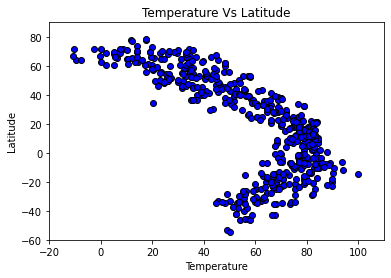

In [12]:
scatty('Temperature')
### need to write something to describe this plot

## Latitude vs. Humidity Plot

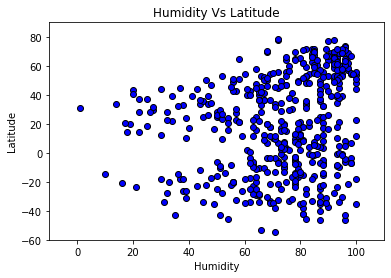

In [13]:
scatty('Humidity')
### need to write something to describe this plot

## Latitude vs. Cloudiness Plot

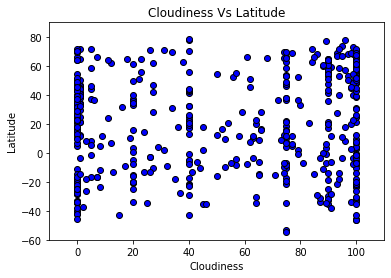

In [14]:
scatty('Cloudiness')
### need to write something to describe this plot
# mabe look at the mode her considering the vertical lines??????

## Latitude vs. Wind Speed Plot

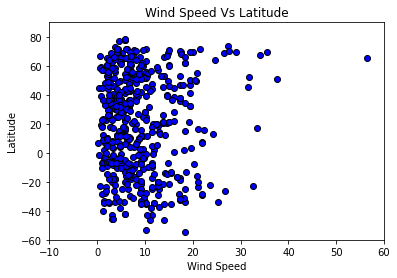

In [15]:
scatty('Wind Speed')
### need to write something to describe this plot

## Linear Regression

In [16]:
### maybe start off by grouping data into latitude greater than 0 and less than 0

## splitting the dataframe in into 2 dataframe, north and south
north_df=city_weather_df.loc[city_weather_df["Latitude"]>=0,:]
south_df=city_weather_df.loc[city_weather_df["Latitude"]<0,:]


# set the linear regression plotting as a function
def plot_line_reg(df,weathery):
    #define x and y values to plot
    x_axis=df[weathery]
    y_axis=df["Latitude"]
    # get regression line stats and line equation
    slope, inter, rval, pval, std_err = stats.linregress(x_axis, y_axis)
    line_eq=f'y={round(slope,2)}x+{round(inter,2)}'

    # defines the line of best fit
    fit_line= slope * x_axis + inter
    plt.xlabel(weathery)
    plt.ylabel("Latitude")
    #sets the titles depending on the north vs south df
    if df['Latitude'].max()>=0:
        plt.title(weathery+" by Latitude in Northern Hemisphere")
        ex_file_name = ('Regress_Line_'+weathery+"_Lat_North.png")
    else:
        plt.title(weathery+" by Latitude in Southern Hemisphere")
        ex_file_name =('Regress_Line_'+weathery+"_Lat_South.png")
    plt.scatter(x_axis,y_axis,edgecolor='black')
    plt.plot(x_axis,fit_line,'--',color="black")
    ## sets the summary stats to be printed
    print_summary = f'The line equation is {line_eq}\nThe R Value is {round(rval,5)}\nThe P Value is {pval}\nThe SEM is {round(std_err,5)}'
    ##exports the plot to a png file
    png_export=os.path.join(import_path.new_folder_path,ex_file_name)
    plt.savefig(png_export)
    return print(print_summary)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y=-0.76x+78.1
The R Value is -0.8982
The P Value is 6.658922263905192e-121
The SEM is 0.02046


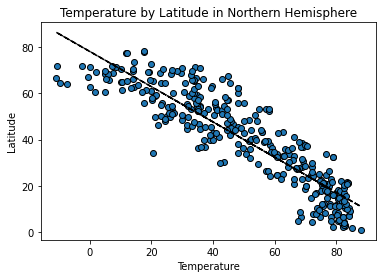

In [17]:
plot_line_reg(north_df,"Temperature")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y=0.73x+-71.45
The R Value is 0.67015
The P Value is 7.298276860030503e-23
The SEM is 0.06328


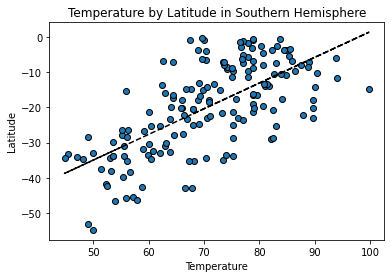

In [18]:
plot_line_reg(south_df,"Temperature")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is y=0.36x+12.95
The R Value is 0.34306
The P Value is 1.1004692760321815e-10
The SEM is 0.05422


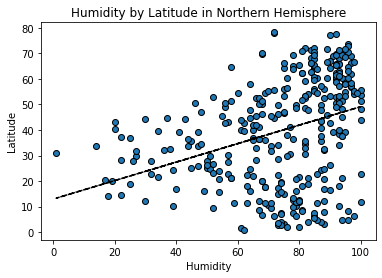

In [19]:
plot_line_reg(north_df,"Humidity")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is y=0.08x+-25.8
The R Value is 0.12027
The P Value is 0.1238675145739366
The SEM is 0.05335


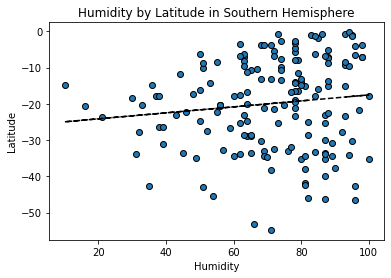

In [20]:
plot_line_reg(south_df,"Humidity")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is y=0.12x+33.34
The R Value is 0.23574
The P Value is 1.2989131804387883e-05
The SEM is 0.02755


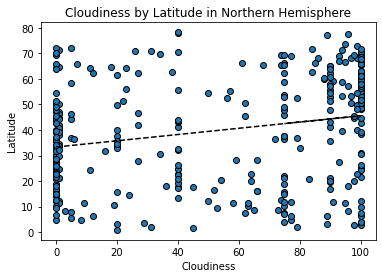

In [21]:
plot_line_reg(north_df,"Cloudiness")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is y=0.04x+-22.27
The R Value is 0.13834
The P Value is 0.07639202842220591
The SEM is 0.02513


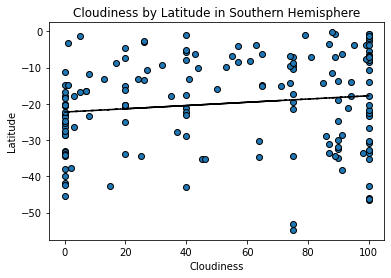

In [22]:
plot_line_reg(south_df,"Cloudiness")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y=0.32x+37.02
The R Value is 0.11147
The P Value is 0.04144898760496645
The SEM is 0.15853


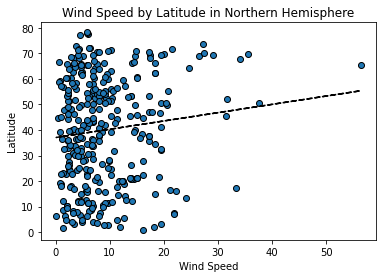

In [23]:
plot_line_reg(north_df,"Wind Speed")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y=-0.45x+-15.98
The R Value is -0.21198
The P Value is 0.006268726261276634
The SEM is 0.16075


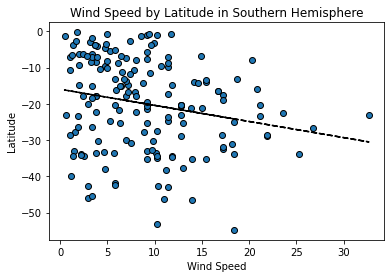

In [24]:
plot_line_reg(south_df,"Wind Speed")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.